In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [118]:
file = pd.read_csv("penguins.csv", usecols=lambda column: column != 'year')
file

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [119]:
data = pd.DataFrame(file)
data = data.dropna()
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [120]:
#categorizing
islands = data["island"].unique()
islandDic = {}
for i, island in enumerate(islands):
    islandDic[island] = i
    
species = data["species"].unique()
penguinDic = {}
for i, penguin in enumerate(species):
    penguinDic[penguin] = i

data["species"]=data["species"].map(penguinDic)
data["sex"]=data["sex"].map({"male":0,"female":1})
data["island"]=data["island"].map(islandDic)

In [121]:
#normalizing
data['bill_depth_mm'] = (data['bill_depth_mm'] - data['bill_depth_mm'].min()) / (data['bill_depth_mm'].max() - data['bill_depth_mm'].min())
data['bill_length_mm'] = (data['bill_length_mm'] - data['bill_length_mm'].min()) / (data['bill_length_mm'].max() - data['bill_length_mm'].min())
data['flipper_length_mm'] = (data['flipper_length_mm'] - data['flipper_length_mm'].min()) / (data['flipper_length_mm'].max() - data['flipper_length_mm'].min())
data['body_mass_g'] = (data['body_mass_g'] - data['body_mass_g'].min()) / (data['body_mass_g'].max() - data['body_mass_g'].min())
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,0.254545,0.666667,0.152542,0.291667,0
1,0,0,0.269091,0.511905,0.237288,0.305556,1
2,0,0,0.298182,0.583333,0.389831,0.152778,1
4,0,0,0.167273,0.738095,0.355932,0.208333,1
5,0,0,0.261818,0.892857,0.305085,0.263889,0
...,...,...,...,...,...,...,...
339,2,2,0.861818,0.797619,0.593220,0.361111,0
340,2,2,0.414545,0.595238,0.508475,0.194444,1
341,2,2,0.636364,0.607143,0.355932,0.298611,0
342,2,2,0.680000,0.702381,0.644068,0.388889,0


In [122]:
#selecting y target
Ytarget = data["sex"]
Xtraget = data.drop(["sex"], axis=1)
Xtraget = Xtraget.values
Ytarget = Ytarget.values

length = len(Xtraget)
trainLen = int(length * 0.8)

#randomly selecting training data
indices = np.random.permutation(length)
training_idx, test_idx = indices[:trainLen], indices[trainLen:]

X_train, X_test = Xtraget[training_idx,:], Xtraget[test_idx,:]
y_train, y_test = Ytarget[training_idx], Ytarget[test_idx]

In [123]:
class LogitRegression():
    def __init__(self,learning_rate,max_iterations):
        self.learningRate=learning_rate
        self.maxIterations=max_iterations
        self.weights=None
        self.bias=None
        self.costs=[]
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def cost(self, trueY, predY):
        cost = 0
        for i in range(len(trueY)):
            cost += (trueY[i] * np.log(predY[i]) + (1 - trueY[i]) * np.log(1 - predY[i]))
        return -cost / len(trueY)
    
    def gradient_descent(self,x,y):
        n = len(x)
        predY = self.sigmoid(np.dot(x,self.weights)+self.bias)
        d_weights = np.matmul(x.T,(predY-y))/n
        d_bias = np.sum(predY-y)/n
        self.weights -= self.learningRate * d_weights
        self.bias -= self.learningRate * d_bias
    
    def fit(self,x,y):
        self.weights=np.zeros(x.shape[1])
        self.bias=0
        for i in range(self.maxIterations):
            self.gradient_descent(x,y)
            predY = self.sigmoid(np.dot(x, self.weights) + self.bias)
            cost_function = self.cost(y, predY)
            self.costs.append(cost_function)
            
        return self.weights,self.bias
    
    def predict(self,x):
        predY = np.dot(x, self.weights) + self.bias
        predY = self.sigmoid(predY)
        predY = [1 if i >= 0.5 else 0 for i in predY]
        return predY

In [124]:
model = LogitRegression(0.01,10000)
w,b = model.fit(X_train,y_train)
predictions = model.predict(X_test)
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy*100)
print("Weights:", model.weights)
print("Predictions:", predictions)
print("Loss:", model.costs)

Accuracy: 80.59701492537313
Weights: [ 0.59690638  0.05371196 -1.67275393 -2.47488592 -0.72128794 -2.19071282]
Predictions: [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
Loss: [0.6930711434988143, 0.6929955367260187, 0.6929203517182574, 0.6928455801367565, 0.69277121382326, 0.6926972447961076, 0.6926236652464024, 0.6925504675342483, 0.6924776441850836, 0.692405187886083, 0.6923330914826434, 0.6922613479749398, 0.6921899505145629, 0.6921188924012238, 0.692048167079533, 0.6919777681358468, 0.6919076892951826, 0.6918379244182038, 0.6917684674982666, 0.6916993126585319, 0.6916304541491378, 0.6915618863444393, 0.6914936037403004, 0.6914256009514534, 0.6913578727089018, 0.6912904138573996, 0.6912232193529649, 0.6911562842604603, 0.6910896037512232, 0.6910231731007438, 0.6909569876863989, 0.6908910429852316, 0.6908253345717784, 0.690759858

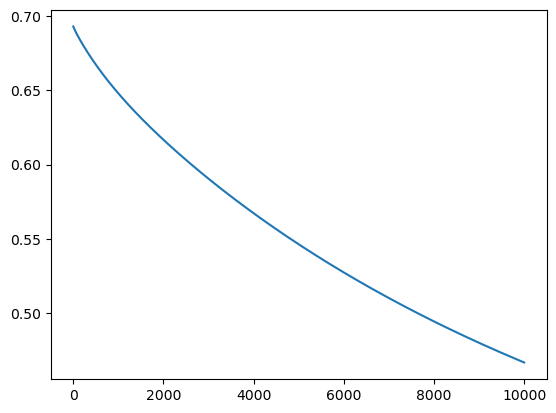

In [125]:
plt.plot(np.arange(len(model.costs)), model.costs)
plt.show()